In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Muat dataset
data = pd.read_csv('diabetes.csv')

# Tampilkan beberapa baris pertama dari dataframe untuk memahami strukturnya
print(data.head())

# Dapatkan beberapa informasi dasar tentang dataset
print(data.info())

# Periksa nilai-nilai yang hilang (missing values)
print(data.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [4]:
# Pisahkan fitur (X) dan target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Bagi data menjadi set pelatihan dan pengujian (80% pelatihan, 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit scaler ke data pelatihan dan transformasikan
X_train_scaled = scaler.fit_transform(X_train)

# Transformasikan data pengujian menggunakan scaler yang telah di-fit
X_test_scaled = scaler.transform(X_test)

print("Bentuk X_train_scaled:", X_train_scaled.shape)
print("Bentuk X_test_scaled:", X_test_scaled.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)

Bentuk X_train_scaled: (614, 8)
Bentuk X_test_scaled: (154, 8)
Bentuk y_train: (614,)
Bentuk y_test: (154,)


In [5]:
# Definisikan model
model = keras.Sequential([
    layers.Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Lapisan input dengan 12 neuron
    layers.Dense(8, activation='relu'),                                         # Lapisan tersembunyi dengan 8 neuron
    layers.Dense(1, activation='sigmoid')                                        # Lapisan output dengan 1 neuron (klasifikasi biner)
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Tampilkan ringkasan model untuk melihat arsitekturnya
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6864 - loss: 0.6706 - val_accuracy: 0.6992 - val_loss: 0.6553
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7141 - loss: 0.6317 - val_accuracy: 0.7236 - val_loss: 0.6134
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7285 - loss: 0.5951 - val_accuracy: 0.7236 - val_loss: 0.5787
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7646 - loss: 0.5669 - val_accuracy: 0.7480 - val_loss: 0.5524
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7598 - loss: 0.5564 - val_accuracy: 0.7642 - val_loss: 0.5301
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7385 - loss: 0.5417 - val_accuracy: 0.7724 - val_loss: 0.5132
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7696 - loss: 0.5279 - val_accuracy: 0.7642 - val_loss: 0.5006
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7835 - loss: 0.5098 - val_accuracy: 0.7642 - 

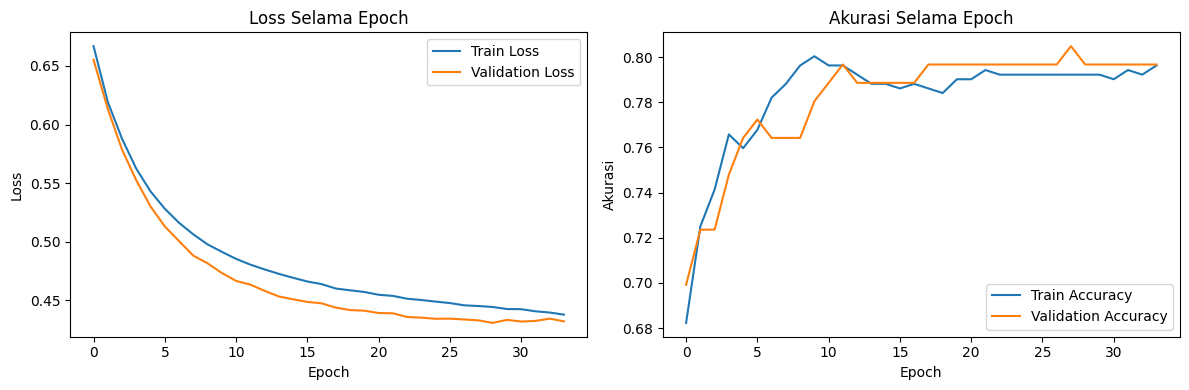

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

#early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Latih model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Plot riwayat pelatihan untuk memvisualisasikan loss dan akurasi selama epoch
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Selama Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Selama Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

Test Loss: 0.4979
Test Akurasi: 0.7143
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



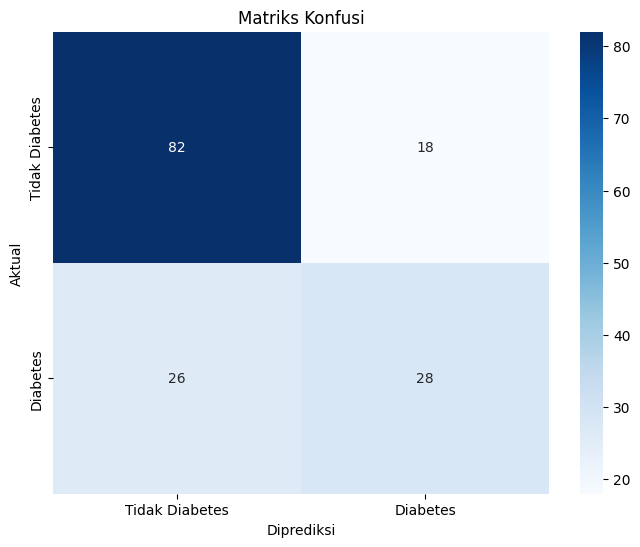

In [7]:
# Evaluasi model pada data pengujian
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Akurasi: {accuracy:.4f}')

# Buat prediksi pada data pengujian
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int) # Konversi probabilitas menjadi prediksi biner (0 atau 1)

# Hasilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Hasilkan matriks konfusi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Diabetes', 'Diabetes'], yticklabels=['Tidak Diabetes', 'Diabetes'])
plt.xlabel('Diprediksi')
plt.ylabel('Aktual')
plt.title('Matriks Konfusi')
plt.show()

In [8]:
model.save("diabetes_model.h5")

import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']